In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report 
import seaborn as sns


In [3]:
data=pd.read_excel(r"C:\Users\Ubaidil\Downloads\vct_2024\agents\agent_pick_rates.xlsx")
Data_champions = data[data['Tournament'].isin(['Valorant Champions 2024'])]

In [4]:
Data_allStages = Data_champions[Data_champions['Stage'].isin(['All Stages'])]
Data_allStages

,Tournament,Stage,Match Type,Map,Agent,Pick Rate
2448,Valorant Champions 2024,All Stages,All Match Types,All Maps,omen,0.62
2449,Valorant Champions 2024,All Stages,All Match Types,All Maps,sova,0.52
2450,Valorant Champions 2024,All Stages,All Match Types,All Maps,viper,0.50
2451,Valorant Champions 2024,All Stages,All Match Types,All Maps,cypher,0.42
2452,Valorant Champions 2024,All Stages,All Match Types,All Maps,raze,0.41
...,...,...,...,...,...,...
2635,Valorant Champions 2024,All Stages,All Match Types,Ascent,clove,0.13
2636,Valorant Champions 2024,All Stages,All Match Types,Ascent,chamber,0.00
2637,Valorant Champions 2024,All Stages,All Match Types,Ascent,iso,0.00
2638,Valorant Champions 2024,All Stages,All Match Types,Ascent,phoenix,0.13


In [5]:
Data_AllMaps = Data_allStages[Data_allStages['Map'].isin(['Ascent'])]
Data_AllMaps

,Tournament,Stage,Match Type,Map,Agent,Pick Rate
2616,Valorant Champions 2024,All Stages,All Match Types,Ascent,omen,0.88
2617,Valorant Champions 2024,All Stages,All Match Types,Ascent,sova,1.00
2618,Valorant Champions 2024,All Stages,All Match Types,Ascent,viper,0.00
2619,Valorant Champions 2024,All Stages,All Match Types,Ascent,cypher,0.38
2620,Valorant Champions 2024,All Stages,All Match Types,Ascent,raze,0.00
2621,Valorant Champions 2024,All Stages,All Match Types,Ascent,fade,0.00
2622,Valorant Champions 2024,All Stages,All Match Types,Ascent,killjoy,0.50
2623,Valorant Champions 2024,All Stages,All Match Types,Ascent,jett,0.88
2624,Valorant Champions 2024,All Stages,All Match Types,Ascent,gekko,0.00
2625,Valorant Champions 2024,All Stages,All Match Types,Ascent,breach,0.00


In [6]:
Agentspick = Data_AllMaps[['Agent','Pick Rate']]
Agentspick

# Membuat DataFrame
AgentspickAscent = pd.DataFrame(Agentspick)

# Menghapus baris dengan 'Pick Rate' yang bernilai 0
AgentspickAscent_cleaned = AgentspickAscent[AgentspickAscent['Pick Rate'] != 0]

In [7]:
AgentspickAscent_cleaned

,Agent,Pick Rate
2616,omen,0.88
2617,sova,1.00
2619,cypher,0.38
2622,killjoy,0.50
2623,jett,0.88
2627,kayo,0.63
2633,deadlock,0.38
2634,sage,0.13
2635,clove,0.13
2638,phoenix,0.13


C:\Users\Ubaidil\AppData\Local\Temp\ipykernel_7852\3330680009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AgentspickAscent_cleaned['Pick Rate'] = AgentspickAscent_cleaned['Pick Rate'] * 100


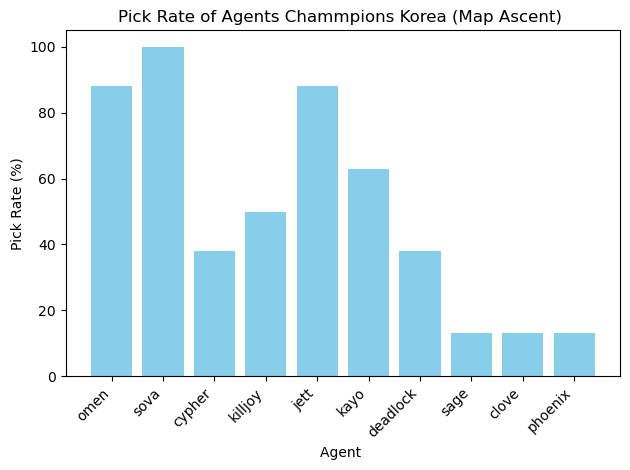

In [8]:

AgentspickAscent_cleaned['Pick Rate'] = AgentspickAscent_cleaned['Pick Rate'] * 100
plt.bar(AgentspickAscent_cleaned['Agent'], AgentspickAscent_cleaned['Pick Rate'], color='skyblue')
plt.title('Pick Rate of Agents Chammpions Korea (Map Ascent) ')
plt.xlabel('Agent ')
plt.ylabel('Pick Rate (%)')
plt.xticks(rotation=45, ha='right')

# Menampilkan plot
plt.tight_layout()  # Agar layout lebih rapih
plt.show()



In [9]:
file_path = 'AgentsPickChampionsKoreaAscent.xlsx'  # Nama file yang ingin disimpan
Agentspick.to_excel(file_path, index=False, engine='openpyxl')

print(f"Data berhasil disimpan ke {file_path}")

Data berhasil disimpan ke AgentsPickChampionsKoreaAscent.xlsx
